# MLP for MNIST Classification

## Introduction

In this notebook, we will going to create, train, and evaluate a [MLP (Multilayer Perceptron)](https://en.wikipedia.org/wiki/Multilayer_perceptron) to classify handwritten digits for MNIST dataset.

The libraries for doing this task are [Tensorflow](tensorflow.org) and [NumPy](https://numpy.org/), and for visualizatoin purposes, [matplotlib](https://matplotlib.org/) will be used.

First we need to import the libarries for further use:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

## Data Preprocess

Next, we will load the MNIST dataset and divide it into training and test sets.

In [ ]:
# Load and divide MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Shape of X_train:{}\nShape of X_test:{}'.format(X_train.shape, X_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Shape of X_train:(60000, 28, 28)
Shape of X_test:(10000, 28, 28)


Let's see a random sample of training set with its actual label.

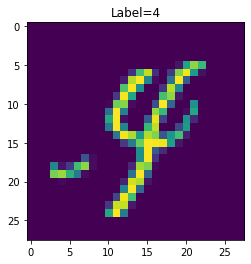

In [ ]:
# Generate a random number and use it as index
rand_index = tf.random.uniform(shape=(), minval=1, maxval=60000, dtype=tf.int32)
plt.imshow(X_train[rand_index])
plt.title('Label=' + str(y_train[rand_index]))
plt.show()

What are the properties of each set? The next code code snippet will print `dtype`, minimum, maximum and range of data.

In [ ]:
# Print some properties of X_train and X_test
print('dtype =',X_train[rand_index].dtype)
print('min =',X_train[rand_index].min())
print('max =',X_train[rand_index].max())
print('range =',X_train[rand_index].ptp())

dtype = uint8
min = 0
max = 255
range = 255


As we can see, the pixel values are unsigned integers (`uint8`) between 0 and 255, but it is better for network to have `float32` values between 0 and 1, so we will scale values in the next lines.

It will also flatten the data because the network gets one dimensional input.

In [ ]:
# Type casting to floating point 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scale the data
X_train = X_train / 255
X_test = X_test / 255

# Flatten the data
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

The network will calculate the probabilty of each digit, so we will apply one hot encoding to our desired outputs. The new labels are as follows:

| # | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|
| 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 2 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 3 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| 4 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 5 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| 6 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 8 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| 9 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

In [ ]:
# Apply one hot encoder
y_train_OH = tf.one_hot(y_train, 10)
y_test_OH = tf.one_hot(y_test, 10)

print('Label of sample #{} is {} and onehot mode is {}'.format(
    rand_index,
    y_train[rand_index],
    y_train_OH[rand_index]
))

Label of sample #57713 is 4 and onehot mode is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Model Creation

We will create a artificial neural network for classifying the digits. The model will have two hidden layer which will use relu activitaion function and have 512 neurons.

The output layer has sigmoid activitation function which will calculate the probabilty of corresponding digit.

In [ ]:
# Create a Sequential with 3 layers
model = tf.keras.models.Sequential(
    [
     layers.Dense(512, activation='relu', input_shape=(28*28,)),
     layers.Dense(512, activation='relu'),
     layers.Dense(10, activation='sigmoid'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Next, we will compile the model using `categorical_crossentropy` loss function and `accuracy` as its metric.

In [ ]:
# Compile model with proper arguments
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

Our model is ready, so we need to fit it on the training data.

We will train it in mini-batch mode, and for 10 epochs.

In [ ]:
# Train model for 10 epochs using mini-batches with size of 64
model.fit(
    X_train, y_train_OH,
    batch_size=64,
    epochs=10,
    verbose=1,
)

Epoch 1/10
938/938 [==============================] - 13s 13ms/step - loss: 0.1958 - accuracy: 0.9401
Epoch 2/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0834 - accuracy: 0.9761
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0602 - accuracy: 0.9830
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0474 - accuracy: 0.9872
Epoch 5/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0381 - accuracy: 0.9895
Epoch 6/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0327 - accuracy: 0.9916
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0308 - accuracy: 0.9923
Epoch 8/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0241 - accuracy: 0.9938
Epoch 9/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0214 - accuracy: 0.9947
Epoch 10/10
938/938 [==============================] - 11s 12ms/step - loss: 0.021

## Model Evaluation

The model is trained so we need to evaluate it on the test dataset.

In [ ]:
# Calculating the loss function and accuracy on test set
score = model.evaluate(X_test, y_test_OH, batch_size=128)

print('loss: {}\naccuracy: {}'.format(score[0], score[1]))

79/79 [==============================] - 1s 6ms/step - loss: 0.1736 - accuracy: 0.9809
loss: 0.17358194291591644
accuracy: 0.98089998960495


The difference between training and test results is not huge so it is not overfitted and works properly.

Let's see an example of wrong predicted samples.

Number of wrong predictions: 195



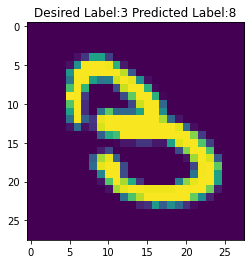

In [ ]:
# Convert one hot coded prediction to digtis
preds = np.argmax(model.predict(X_test),axis=1)

# Find wrong predicted samples on test set
wrong_indices = np.nonzero(preds != y_test)[0]
print('Number of wrong predictions:',len(wrong_indices),end='\n\n')

# Display first wrong prediction
sample_index = wrong_indices[0]
plt.imshow(X_test[sample_index].reshape(28, 28))
plt.title('Desired Label:'+str(y_test[sample_index])+
          ' Predicted Label:'+str(preds[sample_index]))
plt.show()